In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,adjusted_rand_score
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('C:/Users/kobalaji/Desktop/LetsUpgrade AI-ML/Regression/auto_insurance_payment.csv')

In [3]:
dataset.head(10)

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194
5,57,1709
6,23,569
7,14,775
8,45,214
9,10,653


In [50]:
dataset[dataset['Number of claims']==0]

,Number of claims,Total Payment
30,0,0


<AxesSubplot:>

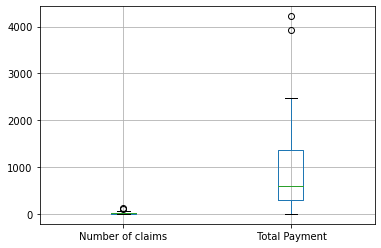

In [4]:
dataset.boxplot()

In [5]:
dataset.corr()

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


<AxesSubplot:>

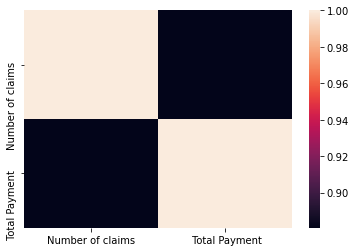

In [6]:
sns.heatmap(dataset.corr())

In [7]:
dataset.isna().sum()

Number of claims    0
 Total Payment      0
dtype: int64

<AxesSubplot:xlabel='Number of claims'>

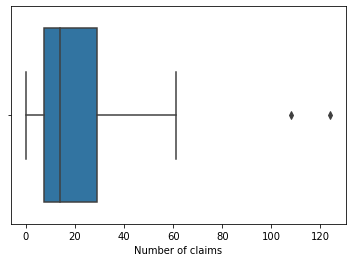

In [8]:
sns.boxplot(dataset['Number of claims'])

<AxesSubplot:xlabel=' Total Payment'>

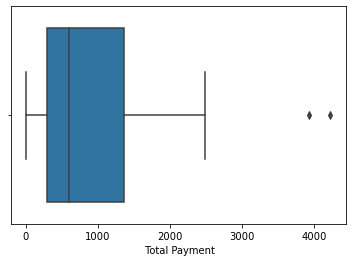

In [9]:
sns.boxplot(dataset[' Total Payment'])

In [10]:
x = dataset.iloc[:,:1]
print(x.head(10))
print(x.size)

   Number of claims
0               108
1                19
2                13
3               124
4                40
5                57
6                23
7                14
8                45
9                10
63


In [11]:
y = dataset.iloc[:,1:]
print(y.head(10))
print(y.size)

    Total Payment
0            3925
1             462
2             157
3            4222
4            1194
5            1709
6             569
7             775
8             214
9             653
63


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state =2)

In [13]:
print('x_train size :',x_train.size)
print('y_train size :',y_train.size)

x_train size : 50
y_train size : 50


In [14]:
print('x_test size :',x_test.size)
print('y_test size :',y_test.size)

x_test size : 13
y_test size : 13


In [15]:
lm = LinearRegression()

In [16]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lm.coef_

array([[32.14357493]])

In [18]:
lm.intercept_

array([194.87747509])

In [19]:
yPred = lm.predict(x_test)

In [20]:
yPred

array([[2155.63554596],
       [3666.38356777],
       [ 612.74394921],
       [ 484.16964948],
       [ 291.30819988],
       [ 452.02607454],
       [ 548.45679934],
       [ 419.88249961],
       [ 612.74394921],
       [ 387.73892468],
       [ 805.6053988 ],
       [ 194.87747509],
       [ 644.88752414]])

In [33]:
df= pd.DataFrame(np.array(x_test),columns=['x_test'])

In [34]:
df['y_test'] = pd.DataFrame(np.array(y_test),columns=['y_test'])

In [35]:
df['yPred'] = pd.DataFrame(data = yPred)

In [36]:
df

,x_test,y_test,yPred
0,61,2176,2155.635546
1,108,3925,3666.383568
2,13,93,612.743949
3,9,874,484.169649
4,3,132,291.308200
5,8,761,452.026075
6,11,572,548.456799
7,7,279,419.882500
8,13,319,612.743949
9,6,146,387.738925


In [37]:
df.sort_values(by= 'x_test')

,x_test,y_test,yPred
11,0,0,194.877475
4,3,132,291.308200
9,6,146,387.738925
7,7,279,419.882500
5,8,761,452.026075
3,9,874,484.169649
6,11,572,548.456799
2,13,93,612.743949
8,13,319,612.743949
12,14,955,644.887524


In [38]:
RMSE = np.sqrt(mean_squared_error(y_test,yPred))

In [39]:
R_square = r2_score(y_test,yPred)

In [40]:
print("RMSE : ", RMSE)
print("R_square: ",round(R_square*100,2),'%')

RMSE :  281.14869574551244
R_square:  92.85 %


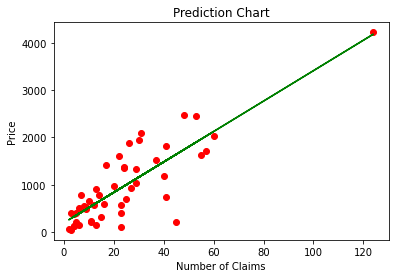

In [41]:
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train,lm.predict(x_train),color='green')
plt.title("Prediction Chart")
plt.xlabel('Number of Claims')
plt.ylabel('Price')
plt.show()

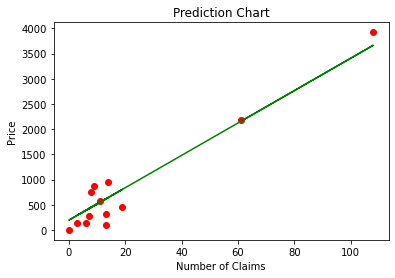

In [42]:
plt.scatter(x_test,y_test, color='red')
plt.plot(x_test,lm.predict(x_test),color='green')
plt.title("Prediction Chart")
plt.xlabel('Number of Claims')
plt.ylabel('Price')
plt.show()

In [48]:
y_check = lm.predict(np.array([[0]]))
y_check

array([[194.87747509]])

array([[194.87747509]])